# Data Merging Basics

Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

## What column to merge on?
Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle. Both the taxi_owners and taxi_veh tables have been loaded for you to explore.

Choose the column you would use to merge the two tables on using the .merge() method.
### Solution
- "vid" in taxi_veh and "vid" in taxi_owners

## Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the taxi_owners and taxi_veh DataFrames are loaded for you.
### Instructions
 - Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.

In [1]:
# Import pandas as pd
import pandas as pd
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
# Load the taxi_owners and taxi_veh DataFrames
taxi_owners = pd.read_csv('../data/taxi_owners.csv')
taxi_veh = pd.read_csv('../data/taxi_veh.csv')

In [3]:
# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


- Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.

In [4]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid',
                                 suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


- Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID        2782
GASOLINE       609
FLEX FUEL       85
COMPRESSED      27
HYBR             1
Name: count, dtype: int64


## Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.
### Instructions
- Merge wards and census on the ward column and save the result to wards_census.

In [6]:
# Load the wards and census DataFrames
wards = pd.read_csv('../data/wards.csv')
census = pd.read_csv('../data/census.csv')

In [7]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)


wards_census table shape: (50, 11)


- Merge the wards_altered and census tables on the ward column, and notice the difference in returned rows.

In [8]:
# Print the first few rows of the wards_altered table to view the change
wards_altered = wards.copy()
print(wards_altered[['ward']].head())

# Merge the wards_altered and census tables on the ward column
wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
print('wards_altered_census table shape:', wards_altered_census.shape)

   ward
0     1
1     2
2     3
3     4
4     5
wards_altered_census table shape: (50, 11)


- Merge the wards and census_altered tables on the ward column, and notice the difference in returned rows

In [9]:
# Print the first few rows of the census_altered table to view the change
census_altered = census.copy()
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered, on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

   ward
0     1
1     2
2     3
3     4
4     5
wards_census_altered table shape: (50, 11)


## One-to-many relationships

## One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

The licenses and biz_owners DataFrames are loaded for you.
### Instructions
 - Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
 - Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
 - Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
 - Use the .head() method to print the first few rows of the sorted_df.

In [10]:
# Merge the licenses and biz_owners table on account
licenses = pd.read_csv('../data/licenses.csv')
biz_owners = pd.read_csv('../data/biz_owners.csv')
licenses_owners = licenses.merge(biz_owners, on='account')

In [11]:
# Group the results by title then count the number of accounts
licenses_owners = licenses.merge(biz_owners, on='account')
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values(by='account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6258
SECRETARY           5204
SOLE PROPRIETOR     1658
OTHER               1199
VICE PRESIDENT       969


## Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.
![Cla](../data/cta_L_diagram.png)
### Instructions
- Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.

In [12]:
# load the ridership and cal DataFrames
cal = pd.read_csv('../data/cal.csv')
stations = pd.read_csv('../data/stations.csv')
ridership = pd.read_csv('../data/ridership.csv')

# head of the DataFrames
print(stations.head())
print(cal.head())
print(ridership.head())

   station_id        station_name    location          NULL
0       40010  Austin-Forest Park  (41.870851   -87.776812)
1       40020         Harlem-Lake  (41.886848   -87.803176)
2       40030        Pulaski-Lake  (41.885412   -87.725404)
3       40040        Quincy/Wells  (41.878723    -87.63374)
4       40050               Davis   (42.04771   -87.683543)
   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
   station_id  year  month  day  rides
0       40010  2019      1    1    576
1       40010  2019      1    2   1457
2       40010  2019      1    3   1543
3       40010  2019      1    4   1621
4       40010  2019      1    5    719


In [13]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal)

- Extend the previous merge to three tables by also merging the stations table.

In [14]:
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                .merge(stations.astype({'station_id': int}), on='station_id')

- Create a variable called filter_criteria to select the appropriate rows from the merged table so that you can sum the rides column.

In [15]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


## Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.
### Instructions
 - Starting with the licenses table, merge to it the zip_demo table on the zip column. Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
 - Group the results of the three merged tables by the column alderman and find the median income.

In [16]:
# Load the zip_demo DataFrames
zip_demo = pd.read_csv('../data/zip_demo.csv')

In [17]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
	.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly              39179.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins Jr.      33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

## One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

The land_use, census, and licenses tables have been loaded for you.
### Instructions
- Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.

In [18]:
# Load the land_use DataFrame
land_use = pd.read_csv('../data/land_use.csv')

In [19]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

- Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, then count the number of accounts. Save the results to pop_vac_lic.

In [20]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'],
                                   as_index=False).agg({'account':'count'})

- Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively. Save it as sorted_pop_vac_lic.

In [21]:
# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant', 'account', 'pop_2010'],
                                             ascending=[False, True, True])

In [22]:
# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

    ward  pop_2010  vacant  account
6      7     51581      19       80
19    20     52372      15      123
9     10     51535      14      130
23    24     54909      13       98
15    16     51954      13      156


# Merging Tables With Different Join Types

## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

The movies and financials tables have been loaded for you.
### Instructions
- Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.

In [23]:
# Import the movies and financials DataFrames
movies = pd.read_csv('../data/movies.csv')
financials = pd.read_csv('../data/financials.csv')

In [24]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

- Count the number of rows in movies_financials with a null value in the budget column.

In [25]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

In [26]:
# Print the number of movies missing financials
print(number_of_missing_fin)

1574


## Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The toy_story DataFrame contains the Toy Story movies. The toy_story and taglines DataFrames have been loaded for you.
### Instructions
- Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.


In [27]:
# Load the toy_story and taglines DataFrames
toy_story = pd.read_csv('../data/toy_story.csv')
taglines = pd.read_csv('../data/taglines.csv')

In [28]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


- With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [29]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


# Other joins

## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.
### Instructions
- Merge scifi_movies and action_movies on the id column using a right join, and save

In [30]:
# Load the movies, scifi_movies, and action_movies DataFrames
movies = pd.read_csv('../data/movies.csv')
scifi_movies = pd.read_csv('../data/scifi_movies.csv')
action_movies = pd.read_csv('../data/action_movies.csv')

In [31]:
# Merge scifi_movies and action_movies on id using a right join
scifi_action = scifi_movies.merge(action_movies, on='movie_id', how='right')

- Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.

In [32]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


- From action_scifi, subset only the rows where the genre_act column is null.

In [33]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

- Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [34]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra       1.681   2001-09-12     18841   
1  26672     The Thief and the Cobbler       2.439   1993-09-23     26672   
2  15301      Twilight Zone: The Movie      12.900   1983-06-24     15301   
3   8452                   The 6th Day      18.450   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey      11.350   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


## Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movie_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.
### Instructions
- Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
- Group genres_movies by genre and count the number of id values.

In [35]:
# Load the pop_movies and movie_to_genres DataFrames
pop_movies = pd.read_csv('../data/pop_movies.csv')
movie_to_genres = pd.read_csv('../data/movie_to_genres.csv')

In [36]:
print(pop_movies.head())
print(movie_to_genres.head())

       id                    title  popularity release_date
0  211672                  Minions     875.581   2015-06-17
1  157336             Interstellar     724.248   2014-11-05
2  293660                 Deadpool     514.570   2016-02-09
3  118340  Guardians of the Galaxy     481.099   2014-07-30
4   76341       Mad Max: Fury Road     434.279   2015-05-13
   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure


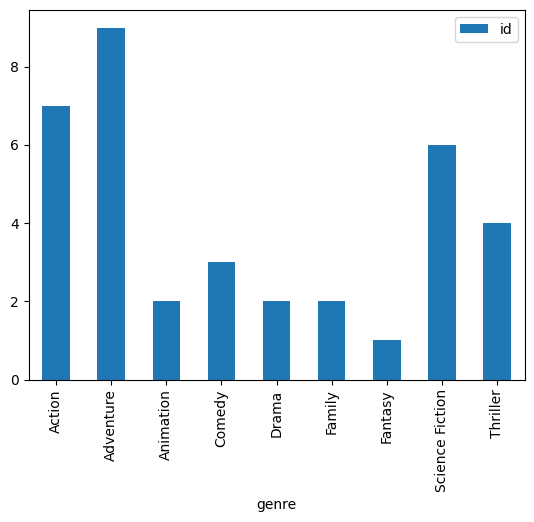

In [37]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', left_on='movie_id', right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.

![outer_join](../data/noJoin.png)
### Instructions
- Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
- Create an index that returns True if name_1 or name_2 are null, and False otherwise.

In [38]:
# Load the iron_1_actors and iron_2_actors DataFrames
iron_1_actors = pd.read_csv('../data/iron_1_actors.csv')
iron_2_actors = pd.read_csv('../data/iron_2_actors.csv')

In [39]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=('_1', '_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) |
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id                           name_1  \
0                        Viper     1  1209419               Tim Rigby   
1                        Viper     2   195442      Russell Richardson   
2  Obadiah Stane / Iron Monger  1229                     Jeff Bridges   
3                          NaN  1245                              NaN   
4                          NaN  1896                              NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1                                               NaN                 NaN  
2                                               NaN                 NaN  
3  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  
4      Lt. Col. James "Rhodey" Rhodes / War Machine         Don Cheadle  


## Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

The crews table has been loaded for you.
### Instructions
- To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.

In [40]:
# Load the crews DataFrame
crews = pd.read_csv('../data/crews.csv')

In [41]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',suffixes=('_dir', '_crew'))

- Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.

In [42]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

- Use the .head() method to print the first few rows of direct_crews.

In [43]:
# Print the first few rows of direct_crews
print(direct_crews.head())

        id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays


# Merging on indexes

## Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Ensure that your merge returns all rows from the movies table, and only matching rows from the ratings table.

The movies and ratings tables have been loaded for you.
### Instructions
- Merge the movies and ratings tables on the id column, keeping all rows from the movies table, and save the result as movies_ratings.

In [44]:
# Load the movies and ratings DataFrames
ratings = pd.read_csv('../data/ratings.csv')

In [45]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist      20.420   2005-09-23           6.7   
1  14290  Better Luck Tomorrow       3.877   2002-01-12           6.5   
2  38365             Grown Ups      38.860   2010-06-24           6.0   
3   9672              Infamous       3.681   2006-11-16           6.4   
4  12819       Alpha and Omega      12.300   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

The sequels and financials tables have been provided.
### Instructions
- With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

In [46]:
# Load the sequels and financials DataFrames
sequels = pd.read_csv('../data/sequels.csv', index_col='id')
financials = pd.read_csv('../data/financials.csv', index_col='id')

In [47]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, left_index=True, right_index=True, how='left')

- Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

In [48]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, left_on='sequel', right_index=True,
                              how='inner', suffixes=('_org', '_seq'))

# Add calculation to subtract revenue_org from revenue_seq
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

- Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

In [49]:
# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

- Sort by titles_diff by diff in descending order and print the first few rows.

In [50]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff',ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.145200e+09
272        Batman Begins  The Dark Knight  6.308000e+08
10138         Iron Man 2       Iron Man 3  5.911000e+08
863          Toy Story 2      Toy Story 3  5.696000e+08
10764  Quantum of Solace          Skyfall  5.229000e+08


# Advanced Merging and Concatenating

## Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

The top_cust and employees tables have been provided for you.
### Instructions
- Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.

In [51]:
# Load the top_cust and employees DataFrames
top_cust = pd.read_csv('../data/top_cust.csv')
employees = pd.read_csv('../data/employees.csv')

In [52]:
# Merge employees and top_cust
empl_cust = employees.merge( top_cust, on='srid',
                            how='left' , indicator=True)

- Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.

In [53]:
# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

- Subset the `employees` table and select those rows where the `srid` is in the variable `srid_list` and print the results.

In [54]:
# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


## Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks.

The tables non_mus_tcks, top_invoices, and genres have been loaded for you.
### Instructions
- Merge `non_mus_tcks` and `top_invoices` on tid using an inner join. Save the result as tracks_invoices.
- Use .isin() to subset the rows of non_mus_tcks where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
- Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
- Merge cnt_by_gid with the genres table on gid and print the result.

In [55]:
# Load the non_mus_tcks, top_invoices, and genres DataFrames
non_mus_tcks = pd.read_csv('../data/non_mus_tcks.csv')
top_invoices = pd.read_csv('../data/top_invoices.csv')
genres = pd.read_csv('../data/genres.csv')

In [56]:
# Merge non_mus_tcks and top_invoices on 'tid' using an inner join
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid': 'count'})

# Merge cnt_by_gid with genres on gid and print the result
result = cnt_by_gid.merge(genres, on='gid')
print(result)


   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


## Concatenate DataFrames together vertically

## Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

The tables tracks_master, tracks_ride, and tracks_st have loaded for you.
### Instructions
- Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.

In [57]:
# Load the tracks DataFrames
tracks_master = pd.read_csv('../data/tracks_master.csv')
tracks_ride = pd.read_csv('../data/tracks_ride.csv')
tracks_st = pd.read_csv('../data/tracks_st.csv')

In [58]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

- Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.

In [59]:
# Concatenate the tracks so the index goes from 0 to n-1

tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],ignore_index=True, sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

- Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.

In [60]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],join='inner',sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


# Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.
### Instructions
- Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to inv_jul_thr_sep.
- Use the .agg() method to find the average of the total column from the grouped invoices.
- Create a bar chart of avg_inv_by_month.

In [3]:
# Import the pandas libraries
import pandas as pd
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Load the invoice DataFrames
inv_jul = pd.read_csv('../data/inv_jul.csv')
inv_aug = pd.read_csv('../data/inv_aug.csv')
inv_sep = pd.read_csv('../data/inv_sep.csv')

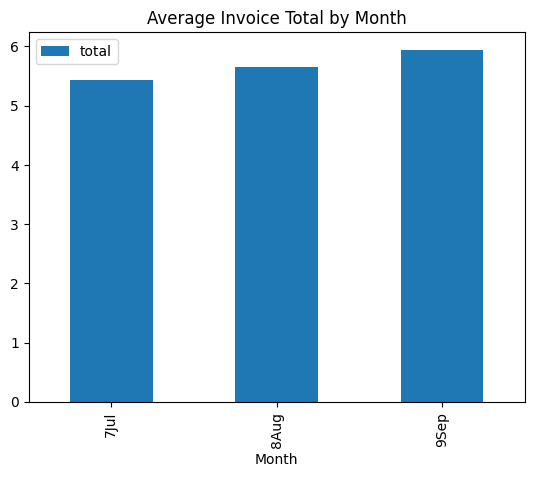

In [4]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep],
                            keys=['7Jul', '8Aug', '9Sep'],
                            names=['Month', 'Invoice'])

avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

avg_inv_by_month.plot(kind='bar', title='Average Invoice Total by Month')
plt.show()

# Verifying integrity

## Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.

The tables classic_18, classic_19, and pop_18, pop_19 have been loaded for you. Additionally, pandas has been loaded as pd.
### Instructions
- Concatenate the classic_18 and classic_19 tables vertically where the index goes from 0 to n-1, and save to classic_18_19.
- Concatenate the pop_18 and pop_19 tables vertically where the index goes from 0 to n-1, and save to pop_18_19.

In [2]:
# Load the classic_18, classic_19,pop_18 and pop_19  DataFrames
classic_18 = pd.read_csv('../data/classic_18.csv')
classic_19 = pd.read_csv('../data/classic_19.csv')
pop_18 = pd.read_csv('../data/pop_18.csv')
pop_19 = pd.read_csv('../data/pop_19.csv')

In [4]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

- With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.
- Use .isin() to filter classic_18_19 where tid is in classic_pop.

In [5]:
# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on='tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    pid   tid
3    12  3479
23   12  3449
48   12  3437
50   12  3435


## Merging Ordered and Time-Series Data

## Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.
### Instructions
- Use merge_ordered() to merge gdp and sp500 using a left join where the year column from gdp is matched with the date column from sp500.
- Print gdp_sp500.

In [10]:
# Load the sp500 and gdp DataFrames
sp500 = pd.read_csv('../data/sp500.csv')
gdp = pd.read_csv('../data/gdp.csv')

In [11]:
# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered( gdp, sp500, left_on='year', right_on='date',
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

  country_code  year           gdp    date  returns
0          USA  2010  1.499000e+13  2010.0    12.78
1          USA  2011  1.554000e+13  2011.0     0.00
2          USA  2012  1.620000e+13  2012.0    13.41
3          USA  2012  1.620000e+13  2012.0    13.41
4          USA  2013  1.678000e+13  2013.0    29.60
5          USA  2014  1.752000e+13  2014.0    11.39
6          USA  2015  1.822000e+13  2015.0    -0.73
7          USA  2016  1.871000e+13  2016.0     9.54
8          USA  2017  1.949000e+13  2017.0    19.42
9          USA  2018  2.049000e+13     NaN      NaN


- Use the merge_ordered() function again, similar to before, to merge gdp and sp500, using the function's ability to fill in missing data for returns by forward-filling the missing values. Assign the resulting table to the variable gdp_sp500.

In [12]:
# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500 = pd.merge_ordered( gdp, sp500, left_on='year', right_on='date',how='left', fill_method='ffill')

# Print gdp_sp500
print (gdp_sp500)

  country_code  year           gdp  date  returns
0          USA  2010  1.499000e+13  2010    12.78
1          USA  2011  1.554000e+13  2011     0.00
2          USA  2012  1.620000e+13  2012    13.41
3          USA  2012  1.620000e+13  2012    13.41
4          USA  2013  1.678000e+13  2013    29.60
5          USA  2014  1.752000e+13  2014    11.39
6          USA  2015  1.822000e+13  2015    -0.73
7          USA  2016  1.871000e+13  2016     9.54
8          USA  2017  1.949000e+13  2017    19.42
9          USA  2018  2.049000e+13  2017    19.42


- Subset the gdp_sp500 table, select the gdp and returns columns, and save as gdp_returns.
- Print the correlation matrix of the gdp_returns table using the .corr() method.

In [13]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

              gdp   returns
gdp      1.000000  0.211734
returns  0.211734  1.000000


## Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables unemployment and inflation have been loaded for you.
### Instructions
- Use merge_ordered() to merge the inflation and unemployment tables on date with an inner join, and save the results as inflation_unemploy.
- Print the inflation_unemploy dataframe.
- Using inflation_unemploy, create a scatter plot with unemployment_rate on the horizontal axis and cpi (inflation) on the vertical axis.

In [16]:
# Load the inflation and unemployment DataFrames
inflation = pd.read_csv('../data/inflation.csv')
unemployment = pd.read_csv('../data/unemployment.csv')

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


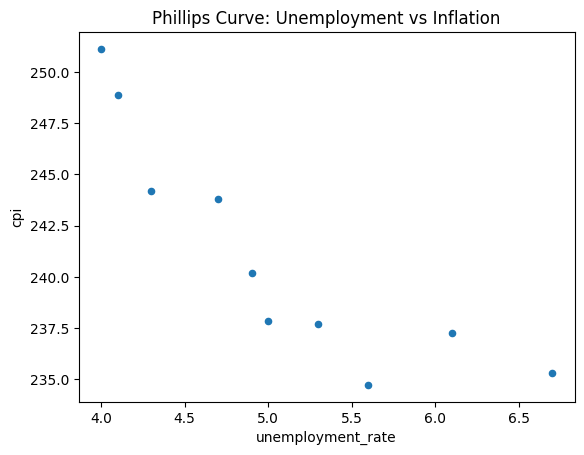

In [17]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(kind='scatter', x='unemployment_rate', y='cpi',
                        title='Phillips Curve: Unemployment vs Inflation')
plt.show()

## merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables gdp and pop have been loaded.
### Instructions
- Use merge_ordered() on gdp and pop, merging on columns date and country with the fill feature, save to ctry_date.

In [49]:
# Load the gdp and pop_pop DataFrames
gdp = pd.read_csv('../data/gdp_pop.csv')
pop = pd.read_csv('../data/pop.csv')

In [50]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill')
# Print ctry_date
print(ctry_date)

          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3   1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5   1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7   1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9   1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11  1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL

- Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.

In [ ]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

# Print date_ctry
print(date_ctry)

### When to use merge_asof()
- Data sampled from a process
- Developing a training set (no data leakage)

## Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named jpm, wells, and bac.
### Instructions
- Use merge_asof() to merge jpm (left table) and wells together on the date_time column, where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
- Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
- Plot the close prices of close_jpm, close_wells, and close_bac from price_diffs.

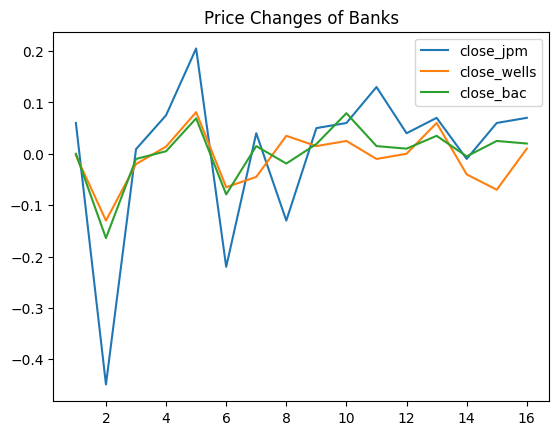

In [72]:
# Load the jpm, wells, and bac DataFrames
jpm = pd.read_csv('../data/jpm.csv')
wells = pd.read_csv('../data/wells.csv')
bac = pd.read_csv('../data/bac.csv')

# Convert date_time columns to datetime objects
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price differences
price_diffs = jpm_wells_bac.diff()

# Plot the price changes using the y argument to specify columns
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'], title='Price Changes of Banks')
plt.show()

## Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables gdp and recession have been loaded for you.
### Instructions
- Using merge_asof(), merge gdp and recession on date, with gdp as the left table. Save to the variable gdp_recession.
- Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
- Using gdp_recession, plot a bar chart of gdp versus date, setting the color argument equal to is_recession.

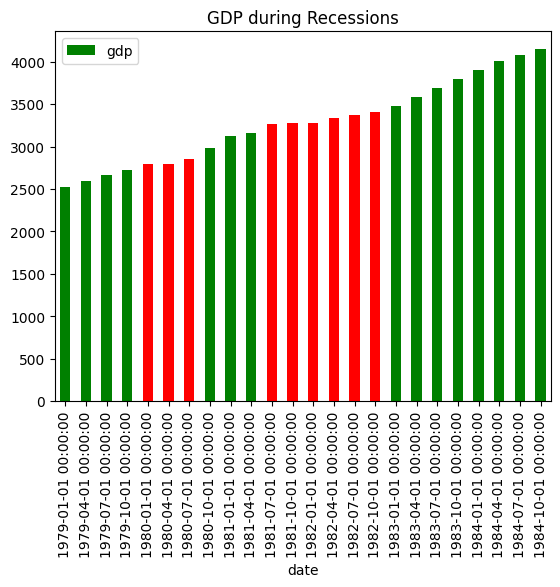

In [9]:
# Load the gdp and recession DataFrames
gdp = pd.read_csv('../data/gdp_r.csv')
recession = pd.read_csv('../data/recession.csv')

# Convert date_time columns to datetime objects
gdp['date'] = pd.to_datetime(gdp['date'])
recession['date'] = pd.to_datetime(recession['date'])

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', x='date', y='gdp', color=is_recession, title='GDP during Recessions', rot=90)
plt.show()

# Selecting Data with .query()
## Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.
### Instructions
- Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.

In [3]:
# Load the gdp and pop DataFrames
gdp = pd.read_csv('../data/gdp_pop.csv')
pop = pd.read_csv('../data/pop.csv')
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

- Add a column named gdp_per_capita to gdp_pop that divides gdp by pop

In [5]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

- Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.

In [6]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='date', columns='country')

- Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.

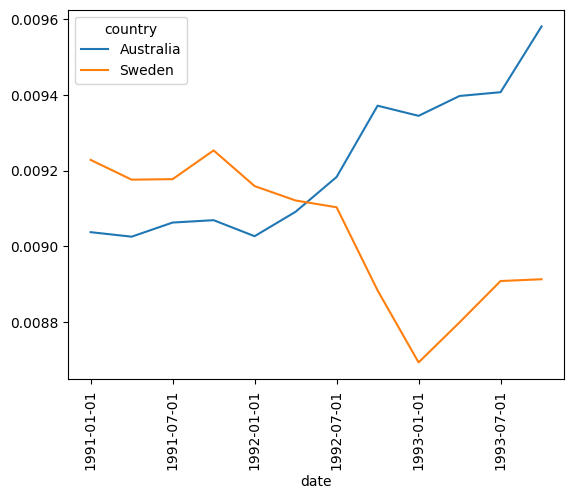

In [7]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# Reshaping data with .melt()
## Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to explore this table before beginning the exercise.
### Instructions
- Use .melt() to unpivot all of the columns of ur_wide except year and ensure that the columns with the months and values are named month and unempl_rate, respectively. Save the result as ur_tall.
- Add a column to ur_tall named date which combines the year and month columns as year-month format into a larger string, and converts it to a date data type.
- Sort ur_tall by date and save as ur_sorted.
- Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis.

In [8]:
# Load the ur_wide DataFrame
ur_wide = pd.read_csv('../data/ur_wide.csv')

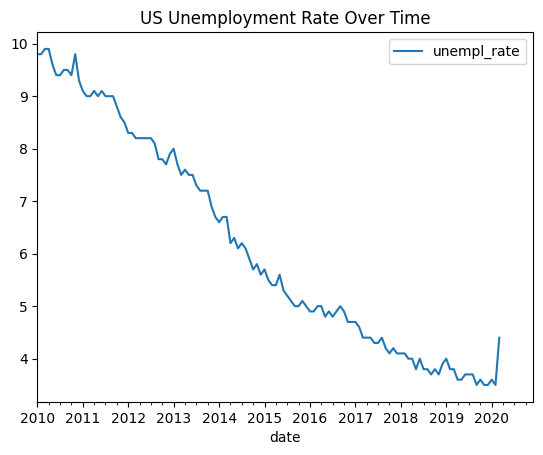

In [9]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'], format='%Y-%b')

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate', kind='line', title='US Unemployment Rate Over Time')
plt.show()

## Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables ten_yr and dji have been loaded for you.
### Instructions
- Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
- Using the .query() method, select only those rows where metric equals close, and save to bond_perc_close.
- Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
- Using dow_bond, plot only the Dow and bond values.

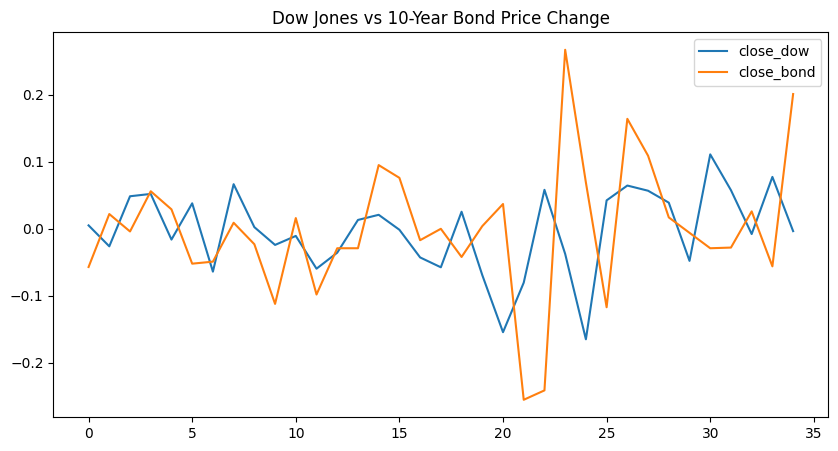

In [12]:
# Load the ten_yr and dji DataFrames
ten_yr = pd.read_csv('../data/ten_yr.csv')
dji = pd.read_csv('../data/dji.csv')
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(x='date', y=['close_dow', 'close_bond'], title='Dow Jones vs 10-Year Bond Price Change', figsize=(10, 5), rot=90)
plt.show()